In [1]:
%%time
import random
from math import exp, sqrt

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2 

values = []

for _ in range(1000000):
    ST = S0 * exp((r - 0.5 * sigma ** 2 ) * T + sigma * random.gauss(0,1) * sqrt(T))
    values.append(ST)
    

CPU times: user 1.53 s, sys: 26.5 ms, total: 1.55 s
Wall time: 1.56 s


In [1]:
%%time
import numpy as np

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2 

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.random.standard_normal(1000000) * np.sqrt(T))

CPU times: user 49.1 ms, sys: 10.8 ms, total: 59.9 ms
Wall time: 65.8 ms


<AxesSubplot:title={'center':'BTC/USD Exchange Rate'}, xlabel='Date'>

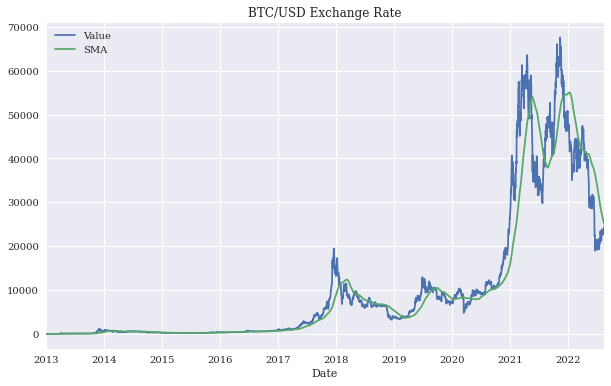

In [6]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'


import configparser
c = configparser.ConfigParser()
c.read('conf.cfg')

import nasdaqdatalink 
nasdaqdatalink.ApiConfig.api_key = c['nasdaq']['api']
d = nasdaqdatalink.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1': ].plot(title = 'BTC/USD Exchange Rate', figsize=(10,6)) 
kkk